In [7]:
import networkx as nx
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt

In [8]:
def readGraphFromFile(filename):
     return nx.read_graphml(filename)

In [9]:
def drawGraph(graph):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=400, font_size=10)
    plt.show()

In [10]:
def longestSimplePath(graph):
    longestPath = []

    totalNodes = len(graph)
    updateInterval = max(totalNodes // 100, 1)

    # Explore each node as a starting point using a stack
    with tqdm(total=totalNodes) as pbar:
        for node in nx.nodes(graph):
            stack = [(node, [node])]  # (node, path to node)
            while stack:
                currentNode, currentPath = stack.pop()
                if len(currentPath) > len(longestPath):
                    longestPath = currentPath[:]

                for neighbor in graph[currentNode]:
                    if neighbor not in currentPath:
                        newPath = currentPath + [neighbor]
                        stack.append((neighbor, newPath))
        
            pbar.update()  # Update progress bar after exploring each starting node

    return longestPath


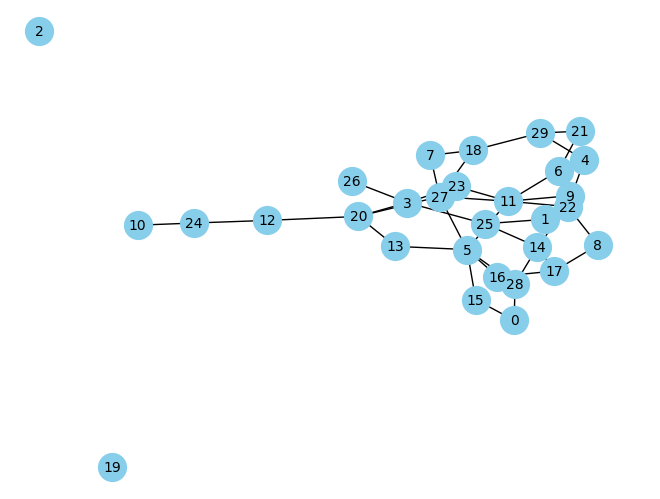

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 37.06it/s]

Elements of longest simple path: ['10', '24', '12', '20', '27', '7', '18', '29', '21', '6', '22', '8', '17', '16', '5', '15', '0', '28', '14', '25', '1', '9', '11', '23', '3', '26']
Longest simple path:  26


In [13]:
filename = 'test1.graphml'
printname = 'test1.txt'
graph = readGraphFromFile(filename) 
drawGraph(graph)
solution = longestSimplePath(graph)
#print("Graph:", graph)
with open(printname, 'w') as f:
    f.write("Elements of longest simple path:\n")
    f.writelines(str(node) + " " for node in solution)
    f.write("\nLongest simple path length: " + str(len(solution)))

print("Elements of longest simple path:", solution)
print("Longest simple path: ", len(solution))